In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path=os.getcwd()
data=pd.read_csv(path+f"\\data\\M5\\sales_train_evaluation.csv")

data.dept_id=data['dept_id'].str.extract('(\d+)')
data.store_id=data['store_id'].str.extract('(\d+)')
data=data.iloc[:,2:]

calendar=pd.read_csv(path+f"\\data\\M5\\calendar.csv")

date_mapping = dict(zip(calendar['d'], calendar['date']))
data.rename(columns=date_mapping, inplace=True)

data=data.groupby(['state_id','store_id','cat_id','dept_id']).sum()
data=data.reset_index()
data=data.drop(columns=['2011-01-29','2011-01-30'])
data.iloc[:,4:].columns=pd.to_datetime(data.iloc[:,4:].columns)


In [361]:
date_columns = pd.to_datetime(data.columns[4:])
date_columns = date_columns.to_period('D')
data.columns = list(data.columns[:4]) + date_columns.astype(str).tolist()


In [12]:
data=pd.read_csv(os.getcwd()+f"\\data\\M5\\data.csv")
levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]
df=data[levels]
structure_list=df.values.tolist()
for level in levels[::-1]:
    df[level]=None
    df=df.drop_duplicates()
    print(df.values.tolist())
    structure_list.extend(df.values.tolist())
structure_list

[['CA', 1, 'FOODS', None], ['CA', 1, 'HOBBIES', None], ['CA', 1, 'HOUSEHOLD', None], ['CA', 2, 'FOODS', None], ['CA', 2, 'HOBBIES', None], ['CA', 2, 'HOUSEHOLD', None], ['CA', 3, 'FOODS', None], ['CA', 3, 'HOBBIES', None], ['CA', 3, 'HOUSEHOLD', None], ['CA', 4, 'FOODS', None], ['CA', 4, 'HOBBIES', None], ['CA', 4, 'HOUSEHOLD', None], ['TX', 1, 'FOODS', None], ['TX', 1, 'HOBBIES', None], ['TX', 1, 'HOUSEHOLD', None], ['TX', 2, 'FOODS', None], ['TX', 2, 'HOBBIES', None], ['TX', 2, 'HOUSEHOLD', None], ['TX', 3, 'FOODS', None], ['TX', 3, 'HOBBIES', None], ['TX', 3, 'HOUSEHOLD', None], ['WI', 1, 'FOODS', None], ['WI', 1, 'HOBBIES', None], ['WI', 1, 'HOUSEHOLD', None], ['WI', 2, 'FOODS', None], ['WI', 2, 'HOBBIES', None], ['WI', 2, 'HOUSEHOLD', None], ['WI', 3, 'FOODS', None], ['WI', 3, 'HOBBIES', None], ['WI', 3, 'HOUSEHOLD', None]]
[['CA', 1, None, None], ['CA', 2, None, None], ['CA', 3, None, None], ['CA', 4, None, None], ['TX', 1, None, None], ['TX', 2, None, None], ['TX', 3, None, None

C:\Users\31683\AppData\Local\Temp\ipykernel_9296\360186420.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  levels=data.columns[pd.to_datetime(data.columns, errors='coerce').isna()]
C:\Users\31683\AppData\Local\Temp\ipykernel_9296\360186420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


[['CA', 1, 'FOODS', 1],
 ['CA', 1, 'FOODS', 2],
 ['CA', 1, 'FOODS', 3],
 ['CA', 1, 'HOBBIES', 1],
 ['CA', 1, 'HOBBIES', 2],
 ['CA', 1, 'HOUSEHOLD', 1],
 ['CA', 1, 'HOUSEHOLD', 2],
 ['CA', 2, 'FOODS', 1],
 ['CA', 2, 'FOODS', 2],
 ['CA', 2, 'FOODS', 3],
 ['CA', 2, 'HOBBIES', 1],
 ['CA', 2, 'HOBBIES', 2],
 ['CA', 2, 'HOUSEHOLD', 1],
 ['CA', 2, 'HOUSEHOLD', 2],
 ['CA', 3, 'FOODS', 1],
 ['CA', 3, 'FOODS', 2],
 ['CA', 3, 'FOODS', 3],
 ['CA', 3, 'HOBBIES', 1],
 ['CA', 3, 'HOBBIES', 2],
 ['CA', 3, 'HOUSEHOLD', 1],
 ['CA', 3, 'HOUSEHOLD', 2],
 ['CA', 4, 'FOODS', 1],
 ['CA', 4, 'FOODS', 2],
 ['CA', 4, 'FOODS', 3],
 ['CA', 4, 'HOBBIES', 1],
 ['CA', 4, 'HOBBIES', 2],
 ['CA', 4, 'HOUSEHOLD', 1],
 ['CA', 4, 'HOUSEHOLD', 2],
 ['TX', 1, 'FOODS', 1],
 ['TX', 1, 'FOODS', 2],
 ['TX', 1, 'FOODS', 3],
 ['TX', 1, 'HOBBIES', 1],
 ['TX', 1, 'HOBBIES', 2],
 ['TX', 1, 'HOUSEHOLD', 1],
 ['TX', 1, 'HOUSEHOLD', 2],
 ['TX', 2, 'FOODS', 1],
 ['TX', 2, 'FOODS', 2],
 ['TX', 2, 'FOODS', 3],
 ['TX', 2, 'HOBBIES', 1],
 [

In [13]:
def sort_key(item):
            # Count the number of None values
            none_count = item.count(None)
            # The primary key is the negative count of None values (more None values means higher rank)
            # The secondary key is the item itself for alphabetical and numerical sorting
            return (-none_count, item)
structure_list=sorted(structure_list, key=sort_key)
structure_list

[[None, None, None, None],
 ['CA', None, None, None],
 ['TX', None, None, None],
 ['WI', None, None, None],
 ['CA', 1, None, None],
 ['CA', 2, None, None],
 ['CA', 3, None, None],
 ['CA', 4, None, None],
 ['TX', 1, None, None],
 ['TX', 2, None, None],
 ['TX', 3, None, None],
 ['WI', 1, None, None],
 ['WI', 2, None, None],
 ['WI', 3, None, None],
 ['CA', 1, 'FOODS', None],
 ['CA', 1, 'HOBBIES', None],
 ['CA', 1, 'HOUSEHOLD', None],
 ['CA', 2, 'FOODS', None],
 ['CA', 2, 'HOBBIES', None],
 ['CA', 2, 'HOUSEHOLD', None],
 ['CA', 3, 'FOODS', None],
 ['CA', 3, 'HOBBIES', None],
 ['CA', 3, 'HOUSEHOLD', None],
 ['CA', 4, 'FOODS', None],
 ['CA', 4, 'HOBBIES', None],
 ['CA', 4, 'HOUSEHOLD', None],
 ['TX', 1, 'FOODS', None],
 ['TX', 1, 'HOBBIES', None],
 ['TX', 1, 'HOUSEHOLD', None],
 ['TX', 2, 'FOODS', None],
 ['TX', 2, 'HOBBIES', None],
 ['TX', 2, 'HOUSEHOLD', None],
 ['TX', 3, 'FOODS', None],
 ['TX', 3, 'HOBBIES', None],
 ['TX', 3, 'HOUSEHOLD', None],
 ['WI', 1, 'FOODS', None],
 ['WI', 1, 'HOBB

In [4]:
data

,state_id,store_id,cat_id,dept_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
0,CA,1,FOODS,1,297,284,214,175,182,191,...,412,435,415,277,302,397,330,310,427,334
1,CA,1,FOODS,2,674,655,396,476,354,486,...,545,611,781,555,476,427,411,434,627,719
2,CA,1,FOODS,3,2268,2198,1398,1607,1496,1730,...,2408,3000,3521,2366,2016,1992,2113,2249,2729,3274
3,CA,1,HOBBIES,1,528,489,409,383,263,453,...,546,732,631,389,347,353,354,494,656,588
4,CA,1,HOBBIES,2,28,9,6,9,5,14,...,42,74,56,28,46,28,52,45,63,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WI,3,FOODS,3,2293,2383,1841,1965,1427,2760,...,2061,2815,3162,1952,1602,1594,1627,2011,2360,2632
66,WI,3,HOBBIES,1,256,342,228,183,70,285,...,202,345,294,187,174,287,220,242,273,305
67,WI,3,HOBBIES,2,22,14,20,11,4,8,...,21,37,38,11,45,45,46,27,31,37
68,WI,3,HOUSEHOLD,1,584,541,420,327,151,392,...,608,937,874,626,597,486,595,764,723,723


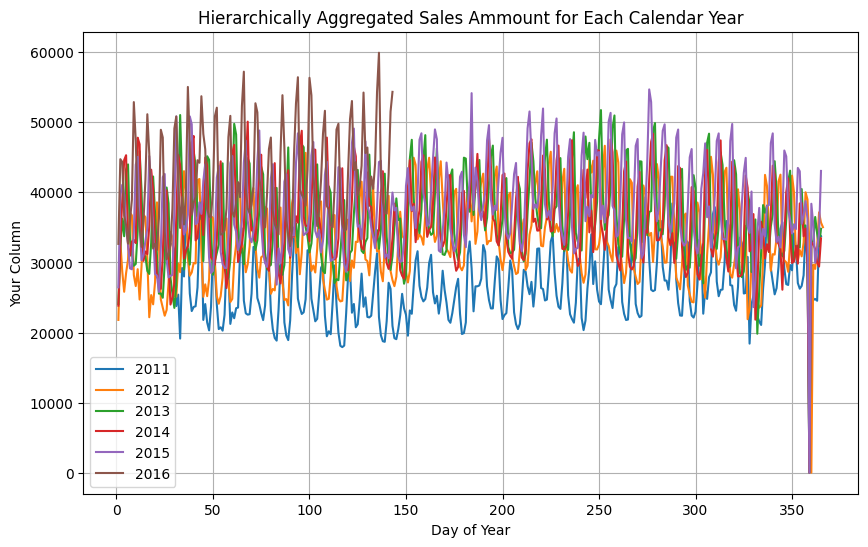

In [10]:
grouped = df.groupby(df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    plt.plot(group.index.dayofyear, group, label=str(year))

# Customize the plot
plt.xlabel('Day of Year')
plt.ylabel('Your Column')
plt.title('Hierarchically Aggregated Sales Ammount for Each Calendar Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

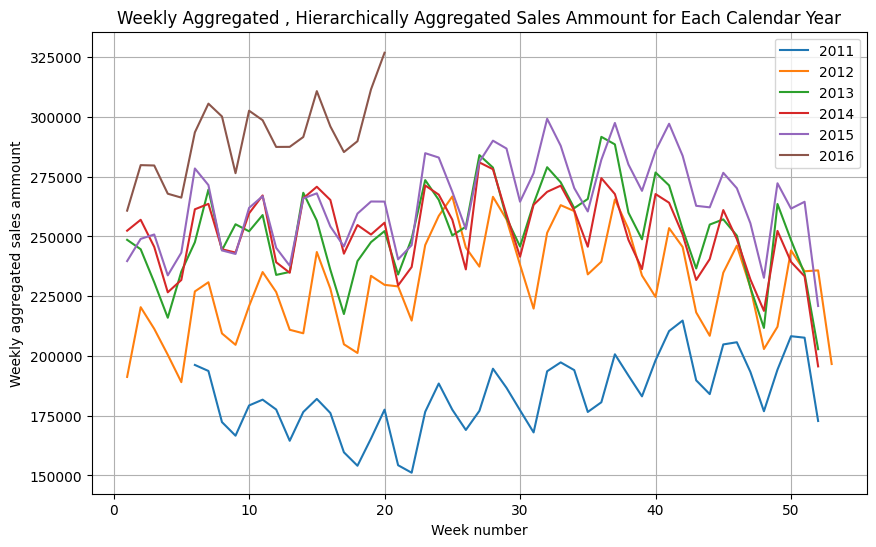

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


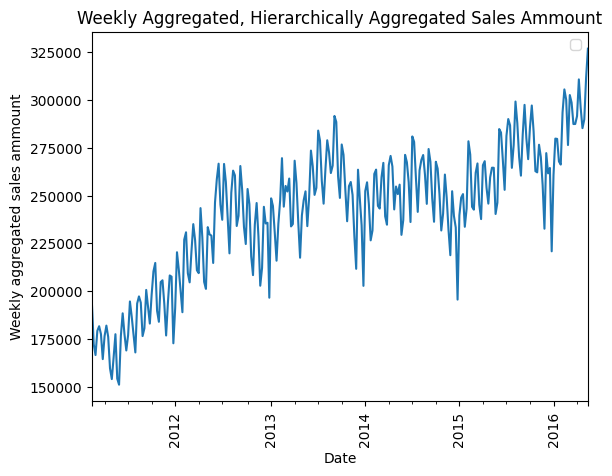

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a datetime index
# Resample the DataFrame to weekly frequency, summing the values
weekly_df = df.resample('W').sum()
weekly_df=weekly_df[1:-1]
# Group the resampled DataFrame by year
grouped = weekly_df.groupby(weekly_df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    week_number = group.index.strftime('%U').astype(int)  # Convert week number to integer
    plt.plot(week_number, group, label=str(year))

# Customize the plot
plt.xlabel('Week number')
plt.ylabel('Weekly aggregated sales ammount')
plt.title('Weekly Aggregated , Hierarchically Aggregated Sales Ammount for Each Calendar Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


weekly_df[1:].plot()
plt.xlabel('Date')
plt.ylabel('Weekly aggregated sales ammount')
plt.title('Weekly Aggregated, Hierarchically Aggregated Sales Ammount')
plt.legend()
plt.xticks(rotation=90)
plt.show()





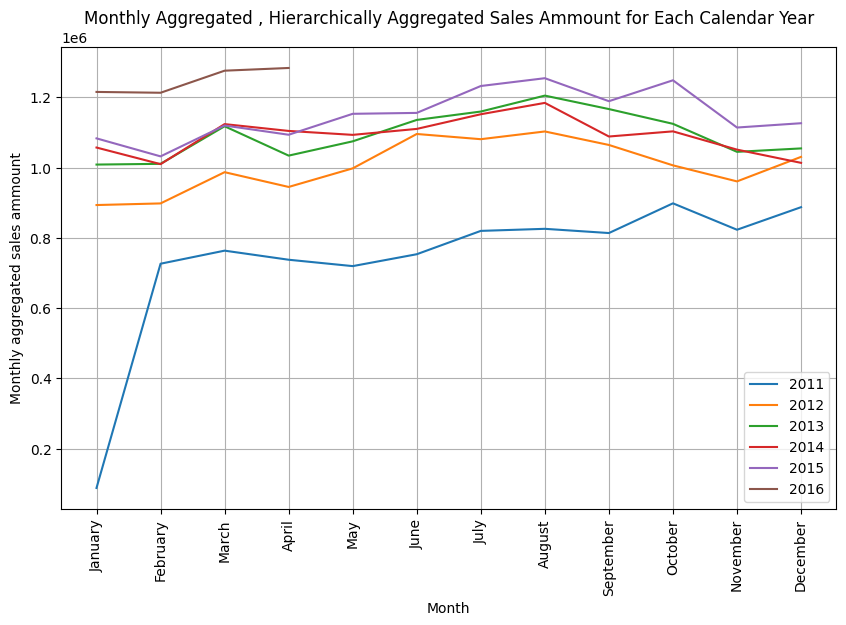

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


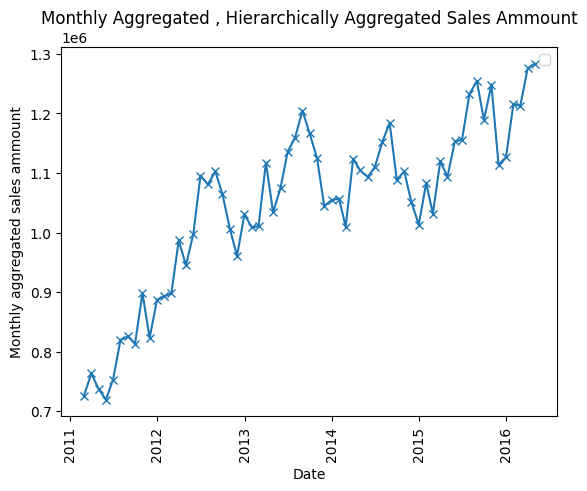

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a datetime index
# Resample the DataFrame to monthly frequency, summing the values
monthly_df = df.resample('M').sum()
monthly_df = monthly_df[:-1]

# Group the resampled DataFrame by year
grouped = monthly_df.groupby(monthly_df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    month_name = group.index.strftime('%B')  # Get month name
    plt.plot(month_name, group, label=str(year))  # Specify the column to plot

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Monthly aggregated sales ammount')
plt.title('Monthly Aggregated , Hierarchically Aggregated Sales Ammount for Each Calendar Year')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

plt.plot(monthly_df[1:],'x', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Monthly aggregated sales ammount')
plt.title('Monthly Aggregated , Hierarchically Aggregated Sales Ammount')
plt.legend()
plt.xticks(rotation=90)
plt.show()



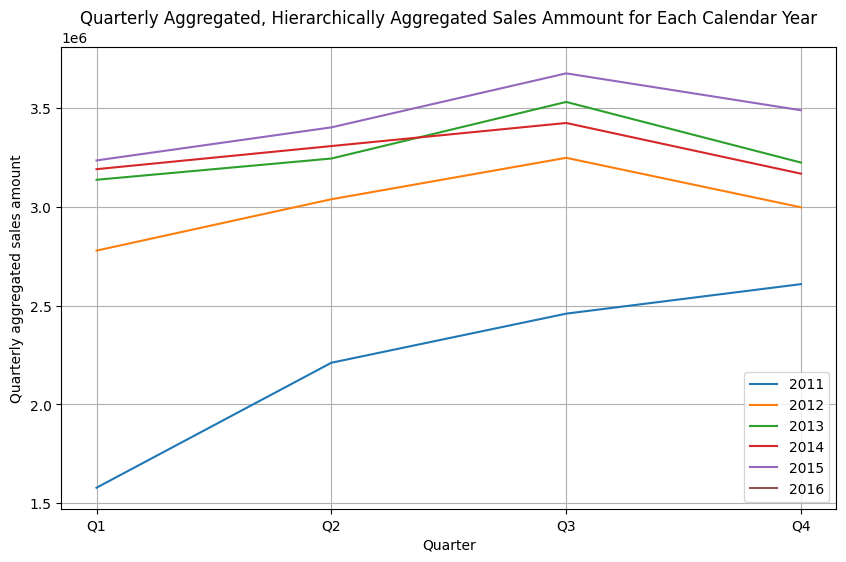

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


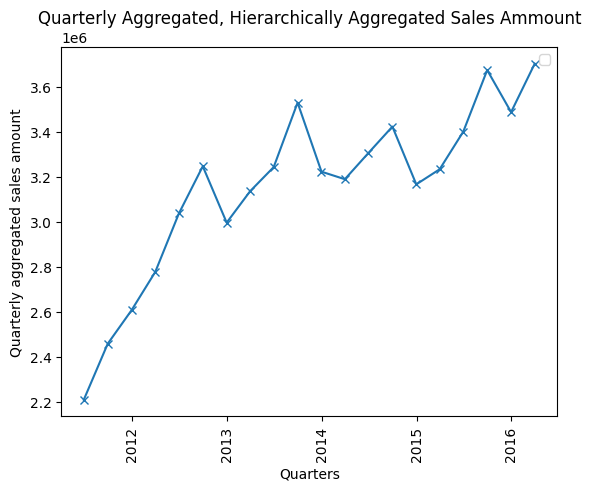

In [264]:
# Resample the DataFrame to quarterly frequency, summing the values
quarterly_df = df.resample('Q').sum()
quarterly_df = quarterly_df[:-1]

# Group the resampled DataFrame by year
grouped = quarterly_df.groupby(quarterly_df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    quarter_name = ['Q1', 'Q2', 'Q3', 'Q4'] * len(group)  # Quarter names
    plt.plot(quarter_name[:len(group)], group, label=str(year))  # Specify the column to plot

# Customize the plot
plt.xlabel('Quarter')
plt.ylabel('Quarterly aggregated sales amount')
plt.title('Quarterly Aggregated, Hierarchically Aggregated Sales Ammount for Each Calendar Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Alternatively, you can directly plot the whole DataFrame
plt.plot(quarterly_df[1:],'x', linestyle='-')
plt.xlabel('Quarters')
plt.ylabel('Quarterly aggregated sales amount')
plt.title('Quarterly Aggregated, Hierarchically Aggregated Sales Ammount')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
quarterly_df = df.resample('Q').sum()
quarterly_df = quarterly_df[:-1]

# Group the resampled DataFrame by year
grouped = quarterly_df.groupby(quarterly_df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    quarter_name = ['Q1', 'Q2', 'Q3', 'Q4'] * len(group)  # Quarter names
    plt.plot(quarter_name[:len(group)], group, label=str(year))  # Specify the column to plot

# Customize the plot
plt.xlabel('Quarter')
plt.ylabel('Quarterly aggregated sales amount')
plt.title('Quarterly Aggregated, Hierarchically Aggregated Sales Ammount for Each Calendar Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Alternatively, you can directly plot the whole DataFrame
plt.plot(quarterly_df[1:],'x', linestyle='-')
plt.xlabel('Quarters')
plt.ylabel('Quarterly aggregated sales amount')
plt.title('Quarterly Aggregated, Hierarchically Aggregated Sales Ammount')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [55]:
i=100

In [56]:
structure_list[i]

['WI', 2, 'FOODS', 1]

In [57]:
column_mask=(data[levels]==structure_list[i]).any(axis=0)
column_mask

state_id    True
store_id    True
cat_id      True
dept_id     True
dtype: bool

In [58]:
row_mask=(data[levels]==structure_list[i]).loc[:,column_mask].all(axis=1)

In [59]:
data[row_mask]

,state_id,store_id,cat_id,dept_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
56,WI,2,FOODS,1,191,184,154,205,96,189,...,466,578,574,454,386,394,336,433,427,398


In [6]:
levels

Index(['state_id', 'store_id', 'cat_id', 'dept_id'], dtype='object')

In [5]:
structure_list

[[None, None, None, None],
 ['CA', None, None, None],
 ['TX', None, None, None],
 ['WI', None, None, None],
 ['CA', 1, None, None],
 ['CA', 2, None, None],
 ['CA', 3, None, None],
 ['CA', 4, None, None],
 ['TX', 1, None, None],
 ['TX', 2, None, None],
 ['TX', 3, None, None],
 ['WI', 1, None, None],
 ['WI', 2, None, None],
 ['WI', 3, None, None],
 ['CA', 1, 'FOODS', None],
 ['CA', 1, 'HOBBIES', None],
 ['CA', 1, 'HOUSEHOLD', None],
 ['CA', 2, 'FOODS', None],
 ['CA', 2, 'HOBBIES', None],
 ['CA', 2, 'HOUSEHOLD', None],
 ['CA', 3, 'FOODS', None],
 ['CA', 3, 'HOBBIES', None],
 ['CA', 3, 'HOUSEHOLD', None],
 ['CA', 4, 'FOODS', None],
 ['CA', 4, 'HOBBIES', None],
 ['CA', 4, 'HOUSEHOLD', None],
 ['TX', 1, 'FOODS', None],
 ['TX', 1, 'HOBBIES', None],
 ['TX', 1, 'HOUSEHOLD', None],
 ['TX', 2, 'FOODS', None],
 ['TX', 2, 'HOBBIES', None],
 ['TX', 2, 'HOUSEHOLD', None],
 ['TX', 3, 'FOODS', None],
 ['TX', 3, 'HOBBIES', None],
 ['TX', 3, 'HOUSEHOLD', None],
 ['WI', 1, 'FOODS', None],
 ['WI', 1, 'HOBB

In [329]:
data

,state_id,store_id,cat_id,dept_id,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
0,CA,1,FOODS,1,214,175,182,191,224,263,...,412,435,415,277,302,397,330,310,427,334
1,CA,1,FOODS,2,396,476,354,486,554,747,...,545,611,781,555,476,427,411,434,627,719
2,CA,1,FOODS,3,1398,1607,1496,1730,1915,2952,...,2408,3000,3521,2366,2016,1992,2113,2249,2729,3274
3,CA,1,HOBBIES,1,409,383,263,453,339,750,...,546,732,631,389,347,353,354,494,656,588
4,CA,1,HOBBIES,2,6,9,5,14,7,19,...,42,74,56,28,46,28,52,45,63,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WI,3,FOODS,3,1841,1965,1427,2760,2727,3786,...,2061,2815,3162,1952,1602,1594,1627,2011,2360,2632
66,WI,3,HOBBIES,1,228,183,70,285,357,399,...,202,345,294,187,174,287,220,242,273,305
67,WI,3,HOBBIES,2,20,11,4,8,3,13,...,21,37,38,11,45,45,46,27,31,37
68,WI,3,HOUSEHOLD,1,420,327,151,392,492,647,...,608,937,874,626,597,486,595,764,723,723


In [338]:
data.groupby()

In [353]:
date_columns = pd.to_datetime(data.columns[4:]).normalize()
data.columns = list(data.columns[:4]) + pd.to_datetime(data.columns[4:]).tolist()
date_columns = pd.to_datetime(data.columns[4:]).normalize()